In [2]:
import cmath
import sympy
import numpy as np
import matplotlib.pyplot as plt

In [48]:
poles = [-0.2054+1j*0.6064, -0.2054-1j*0.6064, -0.0784+1j*0.9812, -0.0784-1j*0.9812, -0.2539]

In [3]:
def hana(s):
  denom=1
  for i in range(5):
    denom= denom*(s**2-0.8615*s/poles[i]+1.2078)
  return (s**2+1.2078)**5/denom

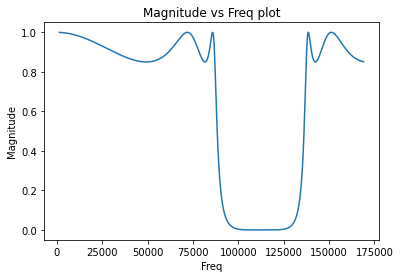

In [42]:
import math
w=np.linspace(0.01,3,1000)
mag=[]
freq=[]
for wi in w:
  freq.append(850000*math.atan(wi)/6.28)
for i in range(w.shape[0]):
  mag.append(np.abs(hana(w[i]*1j)))
mag=np.array(mag)
plt.title('Magnitude vs Freq plot')
plt.xlabel('Freq')
plt.ylabel('Magnitude')
plt.plot(freq,mag)

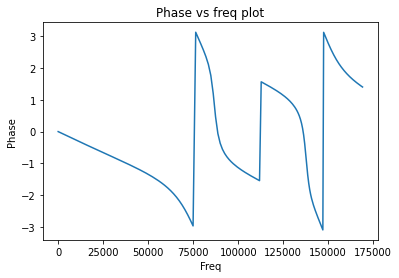

In [43]:
w=np.linspace(0,3,200)
ph=[]
freq=[]
for wi in w:
  freq.append(850000*math.atan(wi)/6.28)
for i in range(w.shape[0]):
  ph.append(cmath.phase(hana(w[i]*1j)))
ph=np.array(ph)
plt.title('Phase vs freq plot')
plt.xlabel('Freq')
plt.ylabel('Phase')
plt.plot(freq,ph)

In [45]:
denom=1
from sympy import expand, symbols
s=symbols('s')
for i in range(5):
    denom= denom*(s**2-0.8615*s/poles[i]+1.2078)
exp=expand(denom)
exp2=expand((s**2+1.2078)**5)
frac= exp2/exp
frac

(1.0*s**10 + 6.039*s**8 + 14.5878084*s**6 + 17.61915498552*s**4 + 10.6402076957555*s**2 + 2.57024857098671)/(s**10 + 4.39585751537681*s**9 + 12.1385055540654*s**8 + 7.7715611723761e-16*I*s**8 + 31.3020573969553*s**7 + 8.88178419700125e-16*I*s**7 + 41.176194167489*s**6 - 2.22044604925031e-15*I*s**6 + 67.4940014413988*s**5 - 3.5527136788005e-15*I*s**5 + 49.7326073154932*s**4 - 6.66133814775094e-16*I*s**4 + 45.6628415832587*s**3 - 1.33226762955019e-15*I*s**3 + 21.3870210649674*s**2 + 1.33226762955019e-15*I*s**2 + 9.35456739291143*s + 2.57024857098671)

In [46]:
zi=symbols('zi')
num=(((1+1j*1.099)-(1-1j*1.099)*zi)*((1-1j*1.099)-(1+1j*1.099)*zi))**5
exp=expand(num)
exp

52.4565384503127*zi**10 + 49.3727521027186*zi**9 + 280.870793732986*zi**8 + 200.990079274545*zi**7 + 580.659025886979*zi**6 - 2.8421709430404e-14*I*zi**6 + 303.247053386028*zi**5 + 580.659025886977*zi**4 + 5.6843418860808e-14*I*zi**4 + 200.990079274545*zi**3 + 1.93849895987731e-15*I*zi**3 + 280.870793732987*zi**2 + 49.3727521027186*zi - 1.82627901154719e-14*I*zi + 52.4565384503127

In [47]:
po=[]
for i in range (5):
  po.append((0.8615/poles[i] + ((0.8615/poles[i])**2-4*1.2078)**0.5)/2)
  po.append((0.8615/poles[i] - ((0.8615/poles[i])**2-4*1.2078)**0.5)/2)
den=1
for i in range (10):
  den=den*((1-po[i])-((1+po[i])*zi))
exp=expand(den)
exp

-30.2047486568994*zi**10 - 8.80641069420306*zi**9 - 1.06581410364015e-14*I*zi**9 + 59.0804650354518*zi**8 + 1.06581410364015e-14*I*zi**8 + 70.8348467903524*zi**7 - 3.5527136788005e-15*I*zi**7 + 287.263155367615*zi**6 + 8.17124146124115e-14*I*zi**6 + 239.421163359445*zi**5 + 7.105427357601e-15*I*zi**5 + 637.16170504581*zi**4 + 9.2370555648813e-14*I*zi**4 + 317.098448052821*zi**3 + 5.6843418860808e-14*I*zi**3 + 588.452789550313*zi**2 + 1.98951966012828e-13*I*zi**2 + 185.419220836778*zi + 286.213902002903 + 2.8421709430404e-14*I